In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import io
import pandas as pd

# Upload the CSV file
uploaded = files.upload()  # choose London_Crimes_2024_Expanded.csv from your computer

# Read the CSV into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded['London_Crimes_2024_Expanded.csv']))

# Quick check
print(df.shape)
print(df.columns)
df.head()


Saving London_Crimes_2024_Expanded.csv to London_Crimes_2024_Expanded.csv
(1048575, 9)
Index(['Crime ID', 'Month', 'Reported by', 'Crime type',
       'Last outcome category', 'LSOA name', 'Location', 'Latitude',
       'Longitude'],
      dtype='object')


,Crime ID,Month,Reported by,Crime type,Last outcome category,LSOA name,Location,Latitude,Longitude
0,e5b3ed0375b796067eb668f37a18094cce300bdbd5446c...,2024-01,Metropolitan Police Service,Other theft,Unable to prosecute suspect,Arun 001C,On or near Queen Street,50.853155,-0.552328
1,d5d46efe4a74b2fdf87f28f7c89c4d7534c80d4150f58f...,2024-01,Metropolitan Police Service,Violence and sexual offences,Status update unavailable,Arun 003D,On or near Northfields Lane,50.848940,-0.666558
2,8ee491f5ebeda54bda879fed602d2f308bfd8abf4b59f7...,2024-01,Metropolitan Police Service,Violence and sexual offences,Status update unavailable,Arun 015C,On or near Kingsmead,50.787270,-0.657460
3,318e91d9bd9ad081bb348b8c743236365c9178eb60229d...,2024-01,Metropolitan Police Service,Violence and sexual offences,Status update unavailable,Ashford 005G,On or near Parking Area,51.147655,0.876815
4,8ec949bf76f02215ad73b489ff502ab32101b0834b49fc...,2024-01,Metropolitan Police Service,Violence and sexual offences,Status update unavailable,Ashford 010G,On or near Southdown Close,51.110654,0.884060


In [ ]:
# Basic info about the data
df.info()

# Number of unique crime types
print("\nUnique crime types:", df['Crime type'].nunique())
print(df['Crime type'].value_counts().head(10))

# Crimes per month
print("\nCrimes per month:")
print(df['Month'].value_counts().sort_index())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Crime ID               832009 non-null   object 
 1   Month                  1048575 non-null  object 
 2   Reported by            1048575 non-null  object 
 3   Crime type             1048575 non-null  object 
 4   Last outcome category  832009 non-null   object 
 5   LSOA name              1047902 non-null  object 
 6   Location               1048575 non-null  object 
 7   Latitude               1047903 non-null  float64
 8   Longitude              1047903 non-null  float64
dtypes: float64(2), object(7)
memory usage: 72.0+ MB

Unique crime types: 14
Crime type
Violence and sexual offences    233322
Anti-social behaviour           216566
Other theft                     101509
Vehicle crime                    89620
Theft from the person            87878
Shoplifting

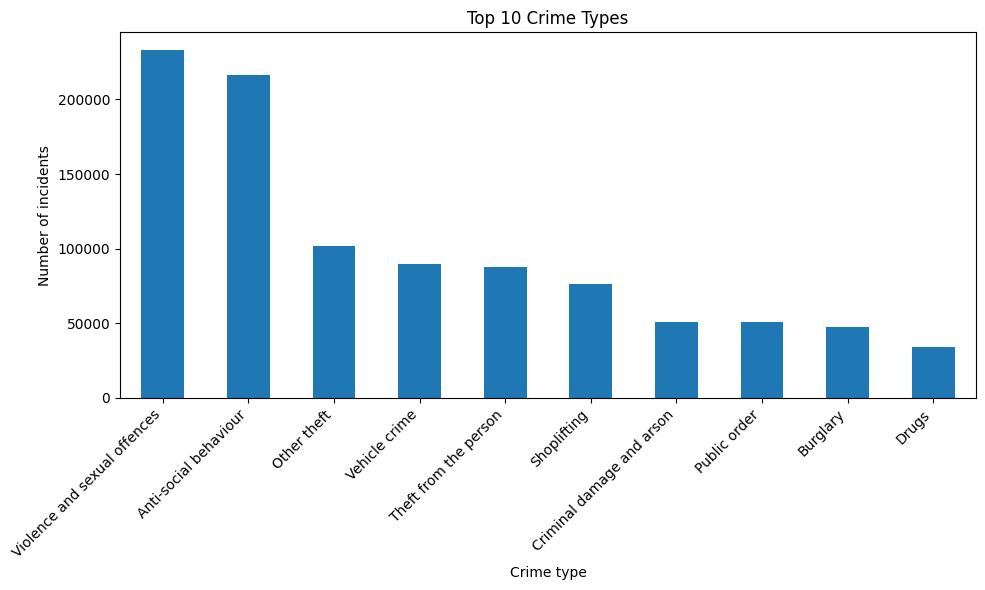

In [ ]:
import matplotlib.pyplot as plt

# Top 10 crime types
crime_counts = df['Crime type'].value_counts().head(10)

plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar')
plt.title('Top 10 Crime Types')
plt.xlabel('Crime type')
plt.ylabel('Number of incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure as an image
plt.savefig('top_10_crime_types.png', dpi=300)
plt.show()


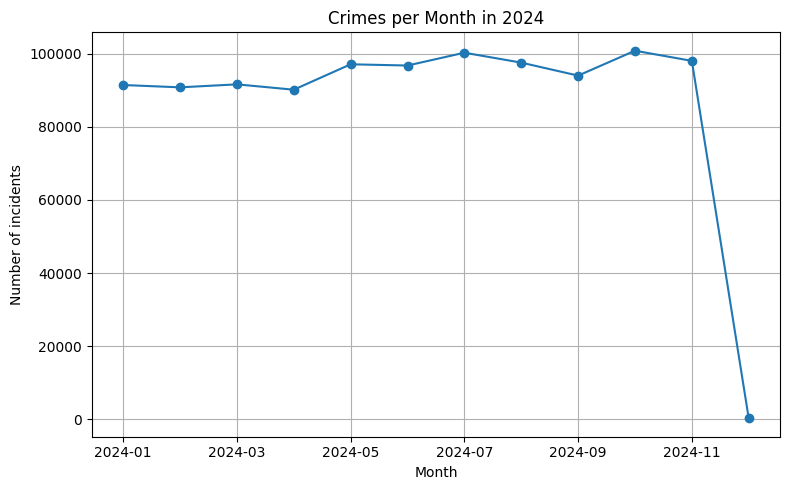

In [ ]:
# Crimes per month
monthly_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
monthly_counts.plot(kind='line', marker='o')
plt.title('Crimes per Month in 2024')
plt.xlabel('Month')
plt.ylabel('Number of incidents')
plt.grid(True)
plt.tight_layout()

plt.savefig('crimes_per_month_2024.png', dpi=300)
plt.show()


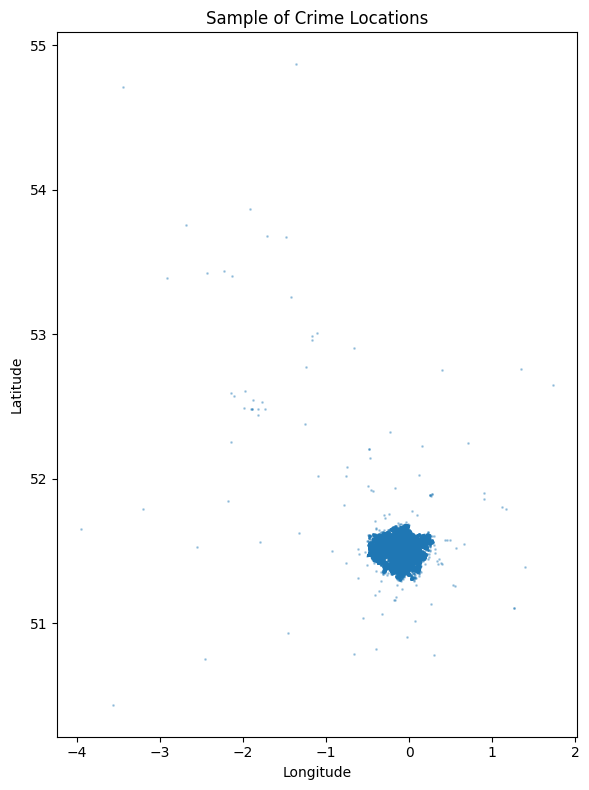

In [ ]:
# For speed, sample e.g. 50,000 points from the full dataset
sample = df.sample(n=50000, random_state=42)

plt.figure(figsize=(6, 8))
plt.scatter(sample['Longitude'], sample['Latitude'], s=1, alpha=0.3)
plt.title('Sample of Crime Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

plt.savefig('crime_locations_scatter.png', dpi=300)
plt.show()


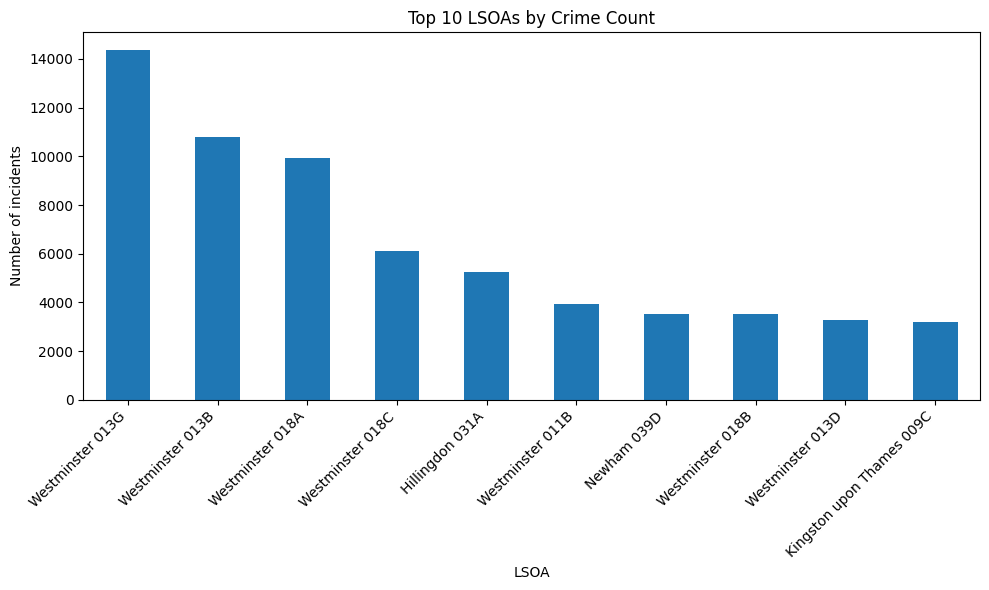

In [ ]:
lsoa_counts = df['LSOA name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
lsoa_counts.plot(kind='bar')
plt.title('Top 10 LSOAs by Crime Count')
plt.xlabel('LSOA')
plt.ylabel('Number of incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('top_10_lsoas.png', dpi=300)
plt.show()
